In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#We can use pandas to help us modify the df, and create vectors with 1's & 0's
df = pd.read_csv("penguins.csv")   

#We can also create labels, 1 = Gentoo, 0 = not gentoo
df["is_gentoo"] = (df["species"] == "Gentoo").astype(int)

# Creating a list of values for X (used later)
X = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].values


# Creating a list of values for Y (The values of being Gentoo or not
y = df["is_gentoo"].values

# 
ones = np.ones((X.shape[0], 1))
X = np.concatenate((ones, X), axis=1)

In [9]:

# Perceptron training function
def perceptron(X, y, eta=0.1, epochs=10):
    w = np.zeros(X.shape[1])
    errors = []
    
    for _ in range(epochs):
        err = 0
        for xi, target in zip(X, y):
            y_hat = np.where(np.dot(xi, w) >= 0, 1, 0)
            update = eta * (target - y_hat)
            w += update * xi
            err += int(update != 0.0)
        errors.append(err)
    
    return w, errors



In [10]:
# Train
w, errors = perceptron(X, y, eta=0.01, epochs=20)



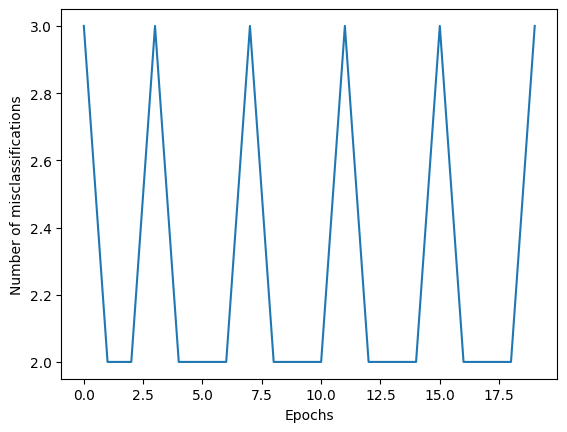

In [11]:
# Plot errors per epoch
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Number of misclassifications")
plt.show()

In [3]:
%pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 16.3 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 25.0 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.
